<a href="https://colab.research.google.com/github/SergeiSa/Computational-Intelligence-Slides-Fall-2020/blob/master/Google%20Colab%20notebooks/practice_03/practice_03_qp_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practice 3: Least Squares and Parameter identification**


## **Identification in the Mechanical systems**


>Suppose that we have mechanical system with dynamics given linearly to parameters ([revise here](https://colab.research.google.com/drive/1UDpCx13PppfQe4u3g0vdq7tpYxaaTujz#scrollTo=exLMblug8v92) ):
\begin{equation}
\mathbf{Q} =  
 \mathbf{Y}(\mathbf{q},\dot{\mathbf{q}},\ddot{\mathbf{q}}) \mathbf{p}
\end{equation}
>where:
>* $\mathbf{Q} \in \mathbb{R}^n $ - generalized forces corresponding to 
>* $\mathbf{q} \in \mathbb{R}^{n}$ - vector of generilized coordinates
>* $\mathbf{Y} \in \mathbb{R}^{n\times p}$ is so called **regressor matrix**
>* $\mathbf{p} \in \mathbb{R}^{p}$ - is full vector of parameters. 
> 

A problem is to find dynamical parameters of this system (masses, motor inertias etc) given just set of measurements from the control system, namely actuator torques/forces $\mathbf{Q}$ and joint coordinates $\mathbf{q}$.


To do so we firstly combine all measurements in augmented regressor and force vector:

>\begin{equation}
\bar{\mathbf{Y}} = 
\begin{bmatrix}
\mathbf{Y}(t_1) \\ 
\mathbf{Y}(t_2) \\
\cdots \\
\mathbf{Y}(t_N) 
\end{bmatrix}= 
\begin{bmatrix}
\mathbf{Y}(\mathbf{q}_1,\dot{\mathbf{q}}_1,\ddot{\mathbf{q}}_1) \\ 
\mathbf{Y}(\mathbf{q}_2,\dot{\mathbf{q}}_2,\ddot{\mathbf{q}}_2) \\ 
\cdots \\
\mathbf{Y}(\mathbf{q}_N,\dot{\mathbf{q}}_N,\ddot{\mathbf{q}}_N) 
\end{bmatrix}, 
\bar{\mathbf{Q}} = 
\begin{bmatrix}
\mathbf{Q}(t_1) \\ 
\mathbf{Q}(t_2) \\
\cdots \\
\mathbf{Q}(t_N) 
\end{bmatrix}
\end{equation}

Now we just need to solve $\bar{\mathbf{Q}} = \bar{\mathbf{Y}}\mathbf{p}$ for $\mathbf{p}$, however a number of rows in $\bar{\mathbf{Y}}$ is typically much larger then numer of columns, thus we can siolve this system by means of minimization of some cost, a common one is:
\begin{equation}
\mathcal{J}_c = \| \bar{\mathbf{Q}} - \bar{\mathbf{Y}}\mathbf{p} \|^2_2
\end{equation}

Which you already know how to solve, just using Moore- Penrose pseudo inverse:
\begin{equation}
\hat{\mathbf{p}} = \underset{\mathbf{x}}{{\text{argmin}}}{\mathcal{J_c}} = \bar{\mathbf{Y}}^+\bar{\mathbf{Q}} =\bar({\bar{\mathbf{Y}}}^T\bar{\mathbf{Y}})^{-1}\bar{\mathbf{Y}}^T\bar{\mathbf{Q}}
\end{equation}

Let us now try to use this solution on the particular system.


## **Case Study: Remotely Driven 2DoF Manipulator**

During this practice we will do this on the remotely driven manipulator that we have studied in our previous classes:

<p><img alt="Remote manipulator" height="250" src="https://drive.google.com/uc?id=1nY6dY3jmwtfXuIy0p1ZUXs3TNC0iSqf5" align="center" hspace="50px" vspace="0px"></p>

To do so we firstly recall regressor of this manipulator:

\begin{equation}
\mathbf{Y} = 
\begin{bmatrix}
 \ddot{\alpha_1} l_{1}^2 + l_{1} g \cos \alpha_1 & \ddot{\alpha_1} & 
\dot{\alpha_1} & 
l_{1} \left(\ddot{\alpha_1} l_{1} + \ddot{\alpha_2} l_{2} \cos{\left (\alpha_1 - \alpha_2 \right )} + \dot{\alpha_2}^{2} l_{2} \sin{\left (\alpha_1 - \alpha_2 \right )} + g \cos{\left (\alpha_1 \right )}\right) 
& 0 & 0\\
0 & 0 & 0 & 
l_{2} \left(\ddot{\alpha_1} l_{1} \cos{\left (\alpha_1 - \alpha_2 \right )} + \ddot{\alpha_2} l_{2} - \dot{\alpha_1}^{2} l_{1} \sin{\left (\alpha_1 - \alpha_2 \right )} + g \cos{\left (\alpha_2 \right )}\right) & 
\ddot{\alpha_2} & 
\dot{\alpha_2}\end{bmatrix}
\end{equation}

That is written with respect to following parameters:

\begin{equation}
\mathbf{p}  = [m_1, J_1, b_1, m_2, J_2, b_2]^T 
\end{equation}

In [ ]:
from numpy import sin, cos, zeros

def regressor(q, dq, ddq, l, g):

    alpha_1, alpha_2 = q
    dalpha_1, dalpha_2 = dq
    ddalpha_1, ddalpha_2 = ddq

    Y = zeros((2,6))
    # Joint 1
    Y[0,0] = l[0]**2 * ddalpha_1 + l[0]*g*cos(alpha_1)
    Y[0,1] = ddalpha_1
    Y[0,2] = dalpha_1
    Y[0,3] = l[0]*l[1]*ddalpha_1 + l[0]*l[1]*cos(alpha_1 - alpha_2)*ddalpha_2\
             + l[0]*l[1]*sin(alpha_1 - alpha_2)*dalpha_2**2\
             + g*l[0]*cos(alpha_1)
    # Joint 2
    Y[1,3] = l[0]*l[1]*cos(alpha_1 - alpha_2)*ddalpha_1 + l[1]**2 * ddalpha_2\
             - l[0]*l[1]*sin(alpha_1 - alpha_2)*dalpha_1**2\
             + g*l[1]*cos(alpha_2)
    Y[1,4] = ddalpha_2
    Y[1,5] = dalpha_2

    return Y




There are three type of trajectories are given for you:

Angles and torques in joints for slow trajectory


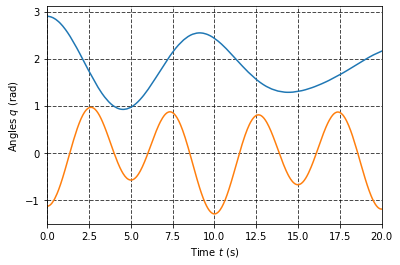

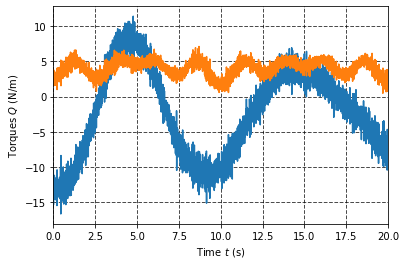

Angles and torques in joints for normal trajectory


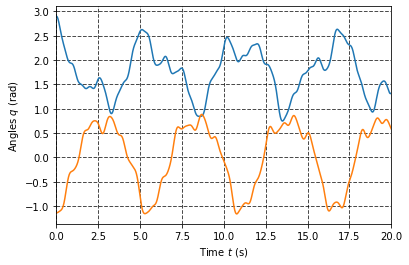

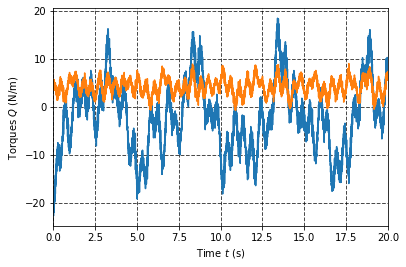

Angles and torques in joints for fast trajectory


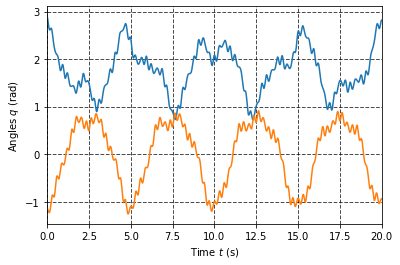

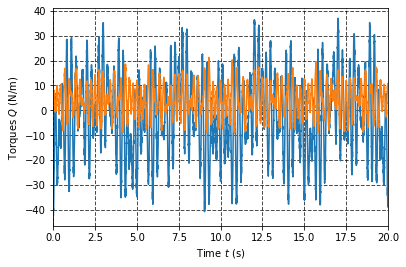

In [ ]:
from numpy import loadtxt
from matplotlib.pyplot import plot, xlim, ylabel, xlabel, show
traj_types = ['slow', 'normal', 'fast']

t, q, Q = dict(), dict(), dict()
for traj_type in traj_types:
  data = loadtxt('traj_'+ traj_type + '.csv', delimiter=',')
  t[traj_type] = data[:,0]
  q[traj_type] = data[:,1:3]
  Q[traj_type] = data[:,3:]

  print('Angles and torques in joints for ' + traj_type + ' trajectory')
  plot(t[traj_type],q[traj_type])
  xlim([t[traj_type][0], t[traj_type][-1]])
  grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
  grid(True)
  ylabel(r'Angles ${q}$ (rad)')
  xlabel(r'Time $t$ (s)')
  show()

  plot(t[traj_type],Q[traj_type])
  xlim([t[traj_type][0], t[traj_type][-1]])
  grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
  grid(True)
  ylabel(r'Torques ${Q}$ (N/m)')
  xlabel(r'Time $t$ (s)')
  show()




Since regressor contain velocity as well as acceleration we need to defirentiate position in order to obtain them:



Velocity and accileration for slow trajectory


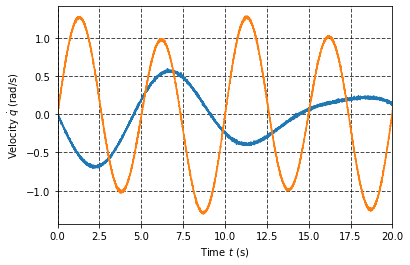

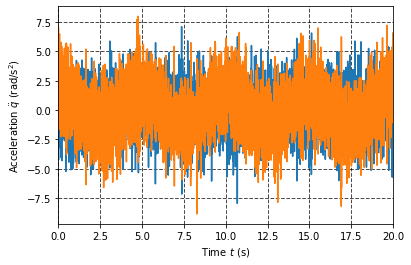

Velocity and accileration for normal trajectory


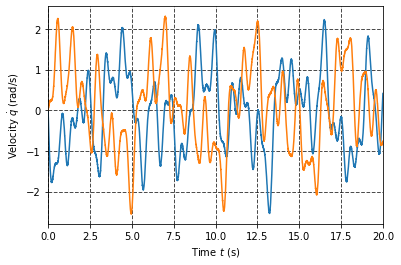

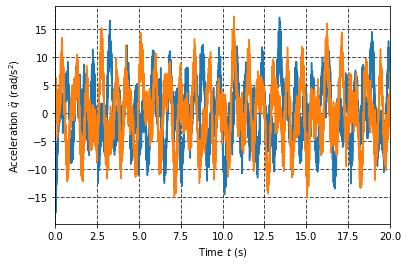

Velocity and accileration for fast trajectory


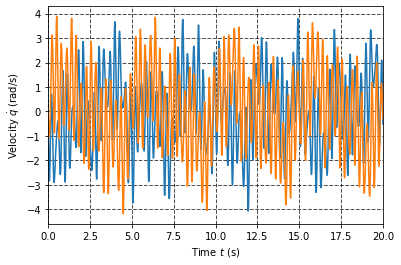

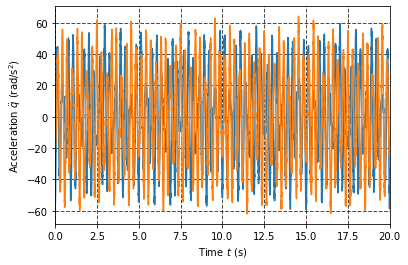

In [ ]:
from numpy import gradient 
dq, ddq = dict(), dict()

for traj_type in traj_types:
  dq[traj_type] = gradient(q[traj_type], t[traj_type], axis = 0)
  ddq[traj_type] = gradient(dq[traj_type], t[traj_type], axis = 0)

  print('Velocity and accileration for ' + traj_type + ' trajectory')
  plot(t[traj_type],dq[traj_type])
  xlim([t[traj_type][0], t[traj_type][-1]])
  grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
  grid(True)
  ylabel(r'Velocity $\dot{q}$ (rad/s)')
  xlabel(r'Time $t$ (s)')
  show()

  plot(t[traj_type],ddq[traj_type])
  xlim([t[traj_type][0], t[traj_type][-1]])
  grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
  grid(True)
  ylabel(r'Acceleration $\ddot{q}$ (rad/s$^2$)')
  xlabel(r'Time $t$ (s)')
  show()

>**QUESTION**:
* What do you think, can we filter velocity, acceleration and torque before calculating regressor? If not explain how you would reduce noise.

Procceding with regressor calculations and augmenting torques:

In [ ]:
g = 9.81
l = 0.5, 0.35
Q_bar, Y_bar = dict(), dict()
for traj_type in traj_types:
  Q_bar[traj_type] = zeros(len(t[traj_type])*2)
  Y_bar[traj_type] = zeros((2*len(t[traj_type]),6))
  for i in range(len(t[traj_type])):
    Q_bar[traj_type][2*i:2*(i+1)] = Q[traj_type][i,:]
    Y = regressor(q[traj_type][i,:], dq[traj_type][i,:], ddq[traj_type][i,:], l, g)
    Y_bar[traj_type][2*i:2*(i+1),:] = Y

A natural question to ask is to which trajectory is better in terms of system identification.

To answer such question you may think of equation $\bar{\mathbf{Q}} = \bar{\mathbf{Y}}\mathbf{p}$ as linear mapping between parameter and force spaces: 

So in order to identify **all parameters** of our system we should be able to somehow inverse this mapping (by using pseudo-inverse for instance), thus one criteria is cruitial
$\sigma_{min} \neq 0$, a 'good' trajectory for identification should in fact minimize the deviation of condition number from one:
\begin{equation}
\mathcal{O}_1 = \kappa - 1 = \frac{\sigma_{max}}{\sigma_{min}} - 1
\end{equation}


In [ ]:
from numpy.linalg import cond

for traj_type in traj_types:
  print('Condition number k(Y) for ' + traj_type + ' trajectory', cond(Y_bar[traj_type]))

Condition number k(Y) for slow trajectory 12.621985808225547
Condition number k(Y) for normal trajectory 6.5636486660573965
Condition number k(Y) for fast trajectory 19.876553635979676



>**HW EXERCISE**:
* Try to explain why is it decireble to minimize $\mathcal{O}_1$
*  Proof that in order to use pseudo-inverse you should have $\sigma_{min} \neq 0$.
*  Is it always possible to identify all parameter of general mechanical system? Provide example where it is not the case. 
*  What is physical interpritation of the **Column space** $\mathcal{C}(\bar{\mathbf{Y}})$ and **Null space** $\mathcal{N}(\bar{\mathbf{Y}})$?

>**BONUS**: 
>*   Try to find such trajectory (just by trials) that minimize $\mathcal{O}_{1}$ while maximizing $\mathcal{O}_{2} = \prod_i \sigma_i$

So now we are ready to solve our problem:

In [ ]:
from numpy.linalg import pinv

p_hat = dict()

for traj_type in traj_types:Sure
  p_hat[traj_type] = dot(pinv(Y_bar[traj_type]),Q_bar[traj_type])
  print('Estimated parameters for ' + traj_type + ' trajectory', p_hat[traj_type])

Estimated parameters for slow trajectory [1.10516396 0.01064903 0.01516329 1.50718101 0.00854068 0.02320772]
Estimated parameters for normal trajectory [1.10255084 0.00963239 0.01955347 1.50960089 0.0109886  0.01746008]
Estimated parameters for fast trajectory [1.10303712 0.0091489  0.02029594 1.50870946 0.01117695 0.0155727 ]


>**HW EXERCISE**:
* Compare estimated parameters with following: 
  * Masses $m_1 = 1.10$ [kg], $m_1 = 1.51$ [kg], 
  * Motor inertias: $I_1 = 9.8\cdot10^{-3}$ [kg m$^2$], $I_2 = 11\cdot10^{-3}$ [kg m$^2$]
  * Joint friction: $b_1 = 21\cdot10^{-2}$ [kg m$^2$], $b_2 = 17\cdot10^{-2}$ [kg m$^2$]
* Which one are more closer in terms of norm $\|\mathbf{p} - \hat{\mathbf{p}}\|_2$?
* Compare accuracy of model predictions of different parameter estimates on different trajectories by calculating mean and standart deviation. 


### **Quadratic Programming Solution**
---
In the last lecture you have studied how to solve the optimization problems in form: 

\begin{equation}
\begin{aligned}
& \underset{\mathbf{x}}{\text{minimize}}
& & \mathbf{x}^T \mathbf{H} \mathbf{x} + \mathbf{g}^T\mathbf{x}, \\
& \text{subject to}
& & \begin{cases}
    \mathbf{A}\mathbf{x} \leq \mathbf{b}, \\
    \mathbf{C}\mathbf{x} = \mathbf{d}.
    \end{cases}
\end{aligned}
\end{equation}

Let us know reformulate our problem as QP and compare the solution with analytical one given by pseudo-inverse:

A cost function $\mathcal{J}_c:
\begin{equation}
\mathcal{J}_c = \| \bar{\mathbf{Q}} - \bar{\mathbf{Y}}\mathbf{p} \|^2_2 = (\bar{\mathbf{Q}} - \bar{\mathbf{Y}}\mathbf{p})^T(\bar{\mathbf{Q}} - \bar{\mathbf{Y}}\mathbf{p}) =  \mathbf{p}^T\bar{\mathbf{Y}}^T\bar{\mathbf{Y}}\mathbf{p} + \bar{\mathbf{Q}}^T\bar{\mathbf{Y}}\mathbf{p} + \bar{\mathbf{Q}}^T\bar{\mathbf{Q}}
\end{equation}

Which is in standart QP form with folowing Hessian and gradient:
\begin{equation}
\mathbf{H} = \bar{\mathbf{Y}}^T\bar{\mathbf{Y}}, \quad \mathbf{g} = {\bar{\mathbf{Y}}^T\bar{\mathbf{Q}}}
\end{equation}



In [ ]:
!pip install quadprog
from quadprog import *

In [ ]:
p_hat_qp = dict()

for traj_type in traj_types:
  H = dot(Y_bar[traj_type].transpose(), Y_bar[traj_type])
  g = dot(Y_bar[traj_type].transpose(), Q_bar[traj_type])
  p_hat_qp[traj_type] = solve_qp(H,g)[0]
  print('Estimated parameters via QP for ' + traj_type + ' trajectory', p_hat_qp[traj_type])

  

Estimated parameters via QP for slow trajectory [1.10516396 0.01064903 0.01516329 1.50718101 0.00854068 0.02320772]
Estimated parameters via QP for normal trajectory [1.10255084 0.00963239 0.01955347 1.50960089 0.0109886  0.01746008]
Estimated parameters via QP for fast trajectory [1.10303712 0.0091489  0.02029594 1.50870946 0.01117695 0.0155727 ]


Which exactly coincides with results obtained by pseudo inverse.

>**HW EXERCISE**:
* Explain why result obtained by pesudo-inverse and quadratic programming coincide.
* What are possible pros and cons of the QP based approach in identification? 
* Suppose there is a noise in one of the torques is much higher than in the other one, how would you modify cost function to tackle this issue?
* Explain connection between singular values of augmented regressor $\sigma(\bar{\mathbf{Y}})$ and properties of Hessian $\mathbf{H}$